# Social Physics Project: Twitter 2

## Modules

In [1]:
# Enable interactive numpy and matplotlib
%pylab inline

# Data Wrangling 
import pandas as pd
import numpy as np

# Data Analysis
import powerlaw as pwl

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker

# Network Analysis 
import networkx as nx
from networkx.algorithms import community
import networkx.algorithms.centrality as nc
import social_physics as soc

# Network Epidemiology 
import EoN

# Data Visualization
import seaborn as sns
from netwulf import visualize

# Other Utilities 
import sys, os, os.path
import itertools
from progressbar import ProgressBar, Bar, Percentage
from operator import itemgetter
from collections import Counter
from collections import defaultdict
import random

# Reload Custom Modules
from importlib import reload
soc = reload(soc)

Populating the interactive namespace from numpy and matplotlib


## Data Collection

In [2]:
# Import the csv files for the first and second order egonetwork data 
fo = "/Users/pietromonticone/github/SocialPhysics/inphyt-project/Tools/Rtweet/Data/pietro_friends.csv" 
so = "/Users/pietromonticone/github/SocialPhysics/inphyt-project/Tools/Rtweet/Data/pietro.csv"

# TEMPORARY ALTERNATIVE PATHS 
### pietro's fo path: "/Users/pietromonticone/github/SocialPhysics/inphyt-project/rtweet/data/pietro_friends.csv"
### pietro's so path: "/Users/pietromonticone/github/SocialPhysics/inphyt-project/rtweet/data/pietro.csv"
### claudio's fo path: r"Q:\IlMIoDrive\magistrale\1anno\terzo_periodo\CSS\progetto\pietroData\pietro_friends.csv"
### claudio's so path: r"Q:\IlMIoDrive\magistrale\1anno\terzo_periodo\CSS\progetto\pietroData\pietro.csv"

# Convert rtweet output (.csv) to a networkx graph object
G = soc.rtweet_to_networkx(fo, so, all = True)

# Rename the graph 
G.name = "Twitter 2nd Order Followee EgoGraph"

# Make sure that the source (i.e. @PietroMonticone) is absent 
G.remove_node(995510456)

# Show the basic attributes of the graph
print(nx.info(G))

# Relable the nodes (from strings of Twitter IDs to integers)
G = nx.convert_node_labels_to_integers(G, first_label=0, ordering='default', label_attribute=None)

Name: Twitter 2nd Order Followee EgoGraph
Type: DiGraph
Number of nodes: 472505
Number of edges: 1075454
Average in degree:   2.2761
Average out degree:   2.2761


## Graph Visualization 

```python 
visualize(G)
```

![](Images/@PietroMonticone2NW.png)

## Graph Data Analysis 

#### Logarithmic Binning

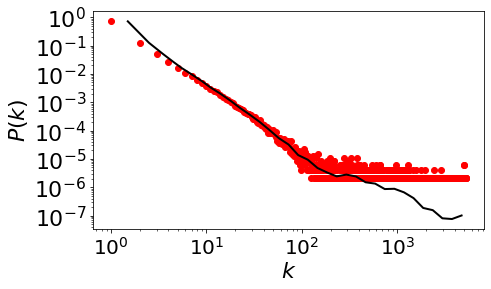

In [3]:
# Set figure size
plt.figure(figsize=(7,4))

# Plot
pwl_distribution = soc.power_law_plot(graph = G, log = True,linear_binning = False, bins = 900000, draw = True)

#### Linear Binning

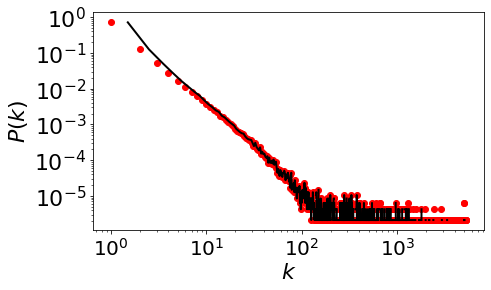

In [4]:
# Set figure size
plt.figure(figsize=(7,4))

# Plot 
pwl_distribution = soc.power_law_plot(graph = G, log = True,linear_binning = True, bins = 90, draw = True)

### Power Law Fitting 

#### Parameters Estimation

In [5]:
# Get undirected degree distribution 
undirected_degree_distribution, degree_mean, degree_variance = soc.get_degree_distribution(G, "degree")


fit_function = pwl.Fit(list(undirected_degree_distribution.values())) # problem here 
#print(sort(list(undirected_degree_distribution.values()))[-1])

print("Exponent = ", fit_function.power_law.alpha)
print("Sigma (error associated to exponent) = ",fit_function.power_law.sigma)
xmin = fit_function.power_law.xmin
print("x_min = ",xmin)
print("Kolmogorov-Smirnov distance = ",fit_function.power_law.D)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/Users/pietromonticone/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


Exponent =  2.322477149872933
Sigma (error associated to exponent) =  0.006873002601212018
x_min =  5.0
Kolmogorov-Smirnov distance =  0.017623190522714993


Because the fitted $x_{min} = 224$, let's require it to be a little higher prior to fitting

In [6]:
fit_function_fix_xmin = pwl.Fit(list(undirected_degree_distribution.values()),xmin= 20) 
print("Exponent = ", fit_function_fix_xmin.power_law.alpha)
print("Sigma (error associated to exponent) = ",fit_function_fix_xmin.power_law.sigma)
print("x_min = ",fit_function_fix_xmin.power_law.xmin)
print("Kolmogorov-Smirnov distance = ",fit_function_fix_xmin.power_law.D)

Exponent =  1.9646315123018794
Sigma (error associated to exponent) =  0.012530852606582382
x_min =  20.0
Kolmogorov-Smirnov distance =  0.10035500699833333


Values less than or equal to 0 in data. Throwing out 0 or negative values


Now the error (sigma) is way lower than before, but Kolmogorov-Smironv is higher as expected (because we fixed $x_min$ prior to fitting). Thus we confirmed that a power law fitting is good only near the tail.<br>
Let us now compare the actual pdf with the fitted power law near the tail.<br>
<span style="color:blue">BLUE</span> : Fitted power law <br>
<span style="color:black">BLACK</span> : plotted pdf

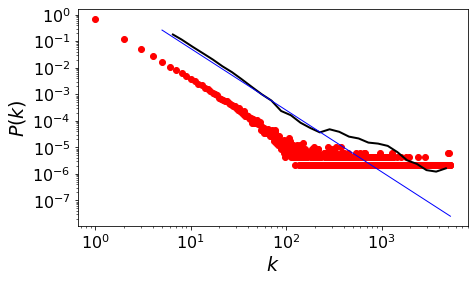

In [7]:
# Set figure size
plt.figure(figsize=(7,4))

pwl_distribution = soc.power_law_plot(graph = G, log = True, linear_binning = False, bins = 90, draw = True, x_min = xmin)

fit_function.power_law.plot_pdf(color='b', linestyle='-', linewidth=1)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('$k$', fontsize=19)
plt.ylabel('$P(k)$', fontsize=19)
plt.show()

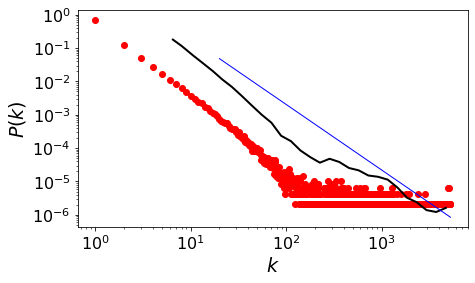

In [8]:
# Set figure size
plt.figure(figsize=(7,4))

#plt.plot(x,y,'ro')

pwl_distribution = soc.power_law_plot(graph = G, log = True,linear_binning = False, bins = 90, draw = True, x_min = xmin)

fit_function_fix_xmin.power_law.plot_pdf(color='b', linestyle='-', linewidth=1)

#fig.legend(fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('$k$', fontsize=19)
plt.ylabel('$P(k)$', fontsize=19)
plt.show()

### Logarithmic Binning

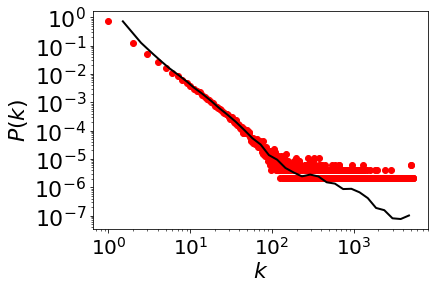

In [9]:
# Plot
pwl_distribution = soc.power_law_plot(graph = G, log = True,linear_binning = False, bins = 900000, draw = True)

### Linear Binning

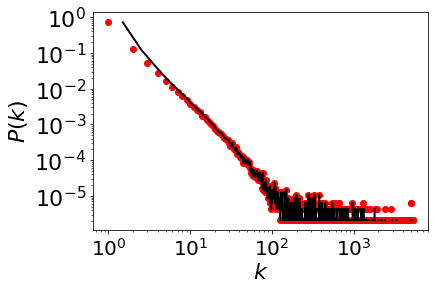

In [10]:
# Plot 
pwl_distribution = soc.power_law_plot(graph = G, log = True,linear_binning = True, bins = 50, draw = True)

## Power Law Fitting 
### Power Law parameters estimation

In [11]:
fit_function = pwl.Fit(list(undirected_degree_distribution.values())) # problem here 
#print(sort(list(undirected_degree_distribution.values()))[-1])
print("exponent = ", fit_function.power_law.alpha)
print("sigma (error associated to exponent) = ",fit_function.power_law.sigma)
xmin = fit_function.power_law.xmin
print("x_min = ",xmin)
print("Kolmogorov-Smirnov distance = ",fit_function.power_law.D)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/Users/pietromonticone/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


exponent =  2.322477149872933
sigma (error associated to exponent) =  0.006873002601212018
x_min =  5.0
Kolmogorov-Smirnov distance =  0.017623190522714993


Because the fitted $x_{min} = 224$, let's require it to be a little higher prior to fitting

In [12]:
fit_function_fix_xmin = pwl.Fit(list(undirected_degree_distribution.values()),xmin= 20) 
print("exponent = ", fit_function_fix_xmin.power_law.alpha)
print("sigma (error associated to exponent) = ",fit_function_fix_xmin.power_law.sigma)
print("x_min = ",fit_function_fix_xmin.power_law.xmin)
print("Kolmogorov-Smirnov distance = ",fit_function_fix_xmin.power_law.D)

exponent =  1.9646315123018794
sigma (error associated to exponent) =  0.012530852606582382
x_min =  20.0
Kolmogorov-Smirnov distance =  0.10035500699833333


Values less than or equal to 0 in data. Throwing out 0 or negative values


Now the error (sigma) is way lower than before, but Kolmogorov-Smironv is higher as expected (because we fixed $x_min$ prior to fitting). Thus we confirmed that a power law fitting is good only near the tail.<br>
Let us now compare the actual pdf with the fitted power law near the tail.<br>
<span style="color:blue">BLUE</span> : Fitted power law <br>
<span style="color:black">BLACK</span> : plotted pdf

Text(0, 0.5, '$P(k)$')

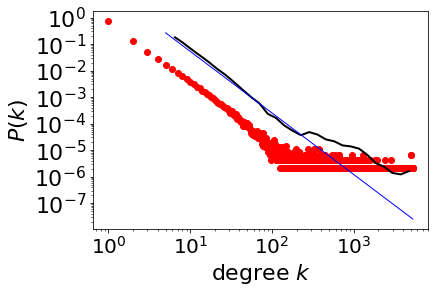

In [13]:
soc = reload(soc)

pwl_distribution = soc.power_law_plot(graph = G, log = True,linear_binning = False, bins = 90, draw = True, x_min = xmin)

fit_function.power_law.plot_pdf(color='b', linestyle='-', linewidth=1)

plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
plt.xlabel('degree $k$', fontsize=22)
plt.ylabel('$P(k)$', fontsize=22)

Text(0, 0.5, '$P(k)$')

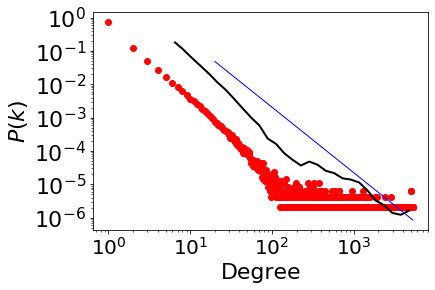

In [14]:
#fig=plt.figure(figsize=(10,7))

#plt.plot(x,y,'ro')

pwl_distribution = soc.power_law_plot(graph = G, log = True,linear_binning = False, bins = 90, draw = True, x_min = xmin)

fit_function_fix_xmin.power_law.plot_pdf(color='b', linestyle='-', linewidth=1)

#fig.legend(fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
plt.xlabel('Degree', fontsize=22)
plt.ylabel('$P(k)$', fontsize=22)

Let us now compare power law against other probability distributions

In [15]:
R,p = fit_function.distribution_compare('power_law', 'exponential', normalized_ratio=True) 
R,p

/Users/pietromonticone/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/pietromonticone/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


(48.998078197258984, 0.0)

In [16]:
R,p = fit_function.distribution_compare('power_law', 'lognormal_positive', normalized_ratio=True)
R,p

(42.34512969638668, 0.0)

In [17]:
R,p = fit_function.distribution_compare('power_law', 'truncated_power_law', normalized_ratio=True)
R,p

Assuming nested distributions


(0.023498461426745634, 0.9904248358583445)

In [18]:
R,p = fit_function.distribution_compare('power_law', 'stretched_exponential', normalized_ratio=True)
R,p

(37.59714005079379, 2.39383864132024e-309)

Let us also compare with the truncated power law:

In [19]:
R,p = fit_function_fix_xmin.distribution_compare('power_law', 'exponential', normalized_ratio=True) 
R,p

(48.04734650417622, 0.0)

In [20]:
R,p = fit_function_fix_xmin.distribution_compare('power_law', 'lognormal_positive', normalized_ratio=True) 
R,p

(30.980291214315326, 9.934871731408163e-211)

In [21]:
R,p = fit_function_fix_xmin.distribution_compare('power_law', 'stretched_exponential', normalized_ratio=True) 
R,p

(24.87597016736134, 1.3543526745550366e-136)

## Centrality Metrics 

#### Degree

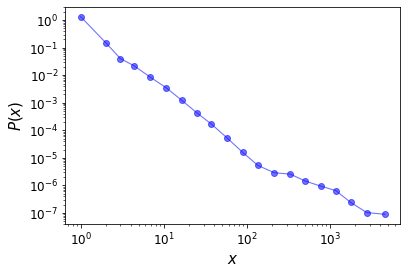

In [22]:
# Get degree centrality 
degree_centrality = soc.get_centrality(G, "degree")

# Plot centrality distribution
soc.plot_centrality_distribution(G, degree_centrality, "Blue", 20)

#### Closeness

In [ ]:
# Get closeness centrality (very computationally intensive!)
closeness_centrality = soc.get_centrality(G, "closeness")

# Plot centrality distribution
soc.plot_centrality_distribution(G, closeness_centrality, "Blue", 30)

#### Bewteenness

In [ ]:
# Get betweenness centrality 
betweenness_centrality = soc.get_centrality(G, "betweenness")

# Plot centrality distribution
soc.plot_centrality_distribution(G, betweenness_centrality, "Blue", 30)

#### Katz

In [ ]:
# Get katz centrality 
katz_centrality = soc.get_centrality(G, "katz")

# Plot centrality distribution
soc.plot_centrality_distribution(G, katz_centrality, "Blue", 30)

#### Eigenvector 

In [ ]:
# Get eigenvector centrality 
eigenvector_centrality = soc.get_centrality(G, "eigenvector")

# Plot centrality distribution
soc.plot_centrality_distribution(G, eigenvector_centrality, "Blue", 50)

#### PageRank
$$x=\frac{1-\alpha}{N}+ \alpha \sum_{j}A^{T}_{ij}\frac{x_j}{k^{out}_j}+\frac{\alpha}{N}\sum_{j|k^{out}_j=0}x_j$$

In [ ]:
# Get pagerank centrality 
pagerank_centrality = soc.get_centrality(G, "pagerank")

# Plot centrality distribution
soc.plot_centrality_distribution(G, pagerank_centrality, "Blue", 30)

## Connectivity 

In [ ]:
# Show the connectivity of the analyzed graph
print("The graph has", G.number_of_nodes(), "nodes and", G.number_of_edges(),"edges.")
print("Is the (directed) graph weakly connected?", nx.is_weakly_connected(G))  # https://en.wikipedia.org/wiki/Directed_graph#Directed_graph_connectivity
print("Is the (directed) graph strongly connected?", nx.is_strongly_connected(G))
print("The graph has", nx.number_weakly_connected_components(G),"weakly connected components")
print("The graph has", nx.number_strongly_connected_components(G),"strongly connected components")

## Clustering 

In [ ]:
# Consider the undirected version (G -> U)
U = G.to_undirected()

# Rename the undirected graph 
U.name = "Twitter Undirected EgoGraph"

# Show the basic attributes of U vs. G 
print(nx.info(U), "\n")
print(nx.info(G))

### Global clustering coefficient

The global clustering coefficient measures the number of triangles in the network and it's defined as

$$ C_\Delta = \frac{3 \times \text{triangles}}{\text{triplets}} $$

In order to compare our graph with theorical models (of the same size), it is thus sufficient to evaluate the number of triangles

In [ ]:
# Create a dictionary of triangles such that 
## keys = nodes
## values = number of triangles the key belongs to
triangles = nx.triangles(U)

# How many triangles are there in the whole network? dividi pr 3 poichè ogni nodo è contato tre volte
number_triangles = sum(list(triangles.values())) / 3 #1350014
print("number_triangles = ",number_triangles)
# Compute the transitivity of H: the fraction of all possible triangles in the network.
print("transitivity = ", nx.transitivity(U))

### Average clustering coefficient

The overall level of clustering in a network is measured by Watts and Strogatz as the average of the local clustering coefficients of all the vertices $n$:

$$\bar{C} = \frac{1}{n}\sum_{i=1}^{n} C_i.$$


It is worth noting that this metric places more weight on the low degree nodes, while the transitivity ratio places more weight on the high degree nodes. In fact, a weighted average where each local clustering score is weighted by $k_i(k_i-1)$ is identical to the global clustering coefficient.

In [ ]:
print("The average clustering coefficient is ", nx.average_clustering(U)) # note: as per https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html and https://networkx.github.io/documentation/stable/_modules/networkx/algorithms/cluster.html , thos function cares about the graph being directed or not

## Stochastic SIR Epidemic on Static Network

In [ ]:
# Model Parameters
mu = 0.2           # Recovery rate 
lambd = 0.01       # Transmission rate per contact

# Simulation Parameters
nrun = 100        # Number of runs

# Multi-Run Simulation
runs = soc.network_SIR_multirun_simulation(G, nrun = nrun, lambd = lambd, mu = mu)

# Set figure size 
plt.figure(figsize=(10,7))

# Plot the ensemble of trajectories
soc.plot_ensemble(runs)

### $\lambda$-Sensitivity of Final Epidemic Size

In [ ]:
# Perform lambda-sensitivity analysis of final epidemic size (normalized attack rate) 
data = soc.network_SIR_finalsize_lambda_sensitivity(G, mu = mu, rho = 0.05 # rho = initial fraction infected
                                                    lambda_min = 0.0001, lambda_max = 1.0, 
                                                    nruns = 8)
# Show sensitivity dataset
data 

# Set figure size 
plt.figure(figsize=(10,7))

# Display a boxplot with final epidemic size vs. transmission rate per contact
soc.boxplot_finalsize_lambda_sensitivity(G, mu = mu, data = data, 
                                         ymin = 0.045, ymax= 1.1,
                                         xlim = (0.00007, 1.5) )